## Import libraries and loading the data

In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from loader import CoraDataLoader

In [54]:
karateGraph = nx.read_gml(path="karate.gml")

loader = CoraDataLoader()
coraGraph, _, _, node_ids = loader.load_complete_dataset()

Loaded content: 2708 papers, 1433 features
Classes: ['Case_Based', 'Genetic_Algorithms', 'Neural_Networks', 'Probabilistic_Methods', 'Reinforcement_Learning', 'Rule_Learning', 'Theory']
Class distribution: [298 418 818 426 217 180 351]
Loaded citations: 5429 edges
Graph is directed: True


# Part 2

### Q1
Creating models

In [55]:
def create_erdos_renyi_model(real_graph):
    
    n = real_graph.number_of_nodes()
    m = real_graph.number_of_edges()
    
    p = 2 * m / (n * (n - 1))
    
    G_er = nx.erdos_renyi_graph(n, p, seed=42)
    
    print("=" * 60)
    print(f"ERDŐS–RÉNYI MODEL for Karate Club Graph")
    print("=" * 60)
    print(f"Real network: n={n}, m={m}")
    print(f"ER model: n={G_er.number_of_nodes()}, m={G_er.number_of_edges()}")
    print(f"Probability p = {p:.4f}")
    
    return G_er

def compare_real_vs_random(real_G, random_G, real_name):
    """Compare real network with Erdős–Rényi model"""
    
    print("\n" + "=" * 60)
    print("COMPARISON: REAL NETWORK vs ERDŐS–RÉNYI MODEL")
    print("=" * 60)
    
    real_measures = calculate_network_measures(real_G, f"Real {real_name}")
    random_measures = calculate_network_measures(random_G, f"ER Model {real_name}")
    
    print("\nCOMPARATIVE RESULTS:")
    print("Metric\t\t\tReal Network\tER Model")
    print("-" * 50)
    print(f"Nodes\t\t\t{real_G.number_of_nodes()}\t\t{random_G.number_of_nodes()}")
    print(f"Edges\t\t\t{real_G.number_of_edges()}\t\t{random_G.number_of_edges()}")
    print(f"Avg. Degree\t\t{real_measures['avg_degree']:.2f}\t\t{random_measures['avg_degree']:.2f}")
    print(f"Avg. Clustering\t\t{real_measures['avg_clustering']:.4f}\t\t{random_measures['avg_clustering']:.4f}")
    print(f"Global Clustering\t{real_measures['global_clustering']:.4f}\t\t{random_measures['global_clustering']:.4f}")
    print(f"Avg. Path Length\t{real_measures['avg_path_length']:.2f}\t\t{random_measures['avg_path_length']:.2f}")
    print(f"Assortativity\t\t{real_measures['assortativity']:.4f}\t\t{random_measures['assortativity']:.4f}")
    print(f"Giant Component\t\t{real_measures['giant_component_ratio']:.1%}\t\t{random_measures['giant_component_ratio']:.1%}")
    
    k_avg = real_measures['avg_degree']
    C_theoretical = k_avg / n 
    print(f"\nTheoretical ER values:")
    print(f"Expected clustering: {C_theoretical:.4f}")
    
    return real_measures, random_measures

def analyze_degree_distribution_comparison(real_G, random_G):
    """Compare degree distributions between real and random networks"""
    
    real_degrees = [d for _, d in real_G.degree()]
    random_degrees = [d for _, d in random_G.degree()]
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(real_degrees, bins=20, alpha=0.7, label='Real Network', edgecolor='black')
    plt.hist(random_degrees, bins=20, alpha=0.7, label='ER Model', edgecolor='black')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution Comparison')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    real_degree_dist = Counter(real_degrees)
    random_degree_dist = Counter(random_degrees)
    
    plt.loglog(list(real_degree_dist.keys()), list(real_degree_dist.values()), 'bo-', label='Real Network')
    plt.loglog(list(random_degree_dist.keys()), list(random_degree_dist.values()), 'ro-', label='ER Model')
    plt.xlabel('Degree (k)')
    plt.ylabel('P(k)')
    plt.title('Log-Log Degree Distribution')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [56]:
def create_watts_strogatz_model(real_graph):    

    n = real_graph.number_of_nodes()
    avg_degree = np.mean([d for _, d in real_graph.degree()])
    
    k = int(avg_degree) 
    p = 0.1  
    
    k = min(k, n-1)
    if k % 2 != 0:
        k = k - 1 
    
    G_ws = nx.watts_strogatz_graph(n, k, p, seed=42)
    
    print("=" * 60)
    print(f"WATTS-STROGATZ MODEL for Karate Club Graph")
    print("=" * 60)
    print(f"Real network: n={n}, avg_degree={avg_degree:.2f}")
    print(f"WS model: n={G_ws.number_of_nodes()}, avg_degree={np.mean([d for _, d in G_ws.degree()]):.2f}")
    print(f"Parameters: k={k}, p={p}")
    
    return G_ws

def compare_all_models(real_G, er_G, ws_G, real_name):
    """Compare real network with both ER and WS models"""
    
    print("\n" + "=" * 70)
    print("COMPREHENSIVE COMPARISON: REAL NETWORK vs MODELS")
    print("=" * 70)
    
    real_measures = calculate_network_measures(real_G, f"Real {real_name}")
    er_measures = calculate_network_measures(er_G, f"ER Model")
    ws_measures = calculate_network_measures(ws_G, f"WS Model")
    
    print("\nCOMPARATIVE RESULTS:")
    print("Metric\t\t\tReal Network\tER Model\tWS Model")
    print("-" * 65)
    print(f"Nodes\t\t\t{real_G.number_of_nodes()}\t\t{er_G.number_of_nodes()}\t\t{ws_G.number_of_nodes()}")
    print(f"Edges\t\t\t{real_G.number_of_edges()}\t\t{er_G.number_of_edges()}\t\t{ws_G.number_of_edges()}")
    print(f"Avg. Degree\t\t{real_measures['avg_degree']:.2f}\t\t{er_measures['avg_degree']:.2f}\t\t{ws_measures['avg_degree']:.2f}")
    print(f"Avg. Clustering\t\t{real_measures['avg_clustering']:.4f}\t\t{er_measures['avg_clustering']:.4f}\t\t{ws_measures['avg_clustering']:.4f}")
    print(f"Global Clustering\t{real_measures['global_clustering']:.4f}\t\t{er_measures['global_clustering']:.4f}\t\t{ws_measures['global_clustering']:.4f}")
    print(f"Avg. Path Length\t{real_measures['avg_path_length']:.2f}\t\t{er_measures['avg_path_length']:.2f}\t\t{ws_measures['avg_path_length']:.2f}")
    print(f"Assortativity\t\t{real_measures['assortativity']:.4f}\t\t{er_measures['assortativity']:.4f}\t\t{ws_measures['assortativity']:.4f}")
    
    print("\n" + "=" * 50)
    print("SMALL-WORLD PROPERTY QUANTIFICATION")
    print("=" * 50)
    
    def calculate_small_world_metrics(real_C, real_L, random_C, random_L):
        sigma = (real_C / random_C) / (real_L / random_L)  
        return sigma
    
    sigma_er = calculate_small_world_metrics(
        real_measures['avg_clustering'],
        real_measures['avg_path_length'],
        er_measures['avg_clustering'],
        er_measures['avg_path_length']
    )
    
    sigma_ws = calculate_small_world_metrics(
        real_measures['avg_clustering'],
        real_measures['avg_path_length'],
        ws_measures['avg_clustering'],
        ws_measures['avg_path_length']
    )
    
    print(f"Small-world coefficient (vs ER): {sigma_er:.2f}")
    print(f"Small-world coefficient (vs WS): {sigma_ws:.2f}")
    
    if sigma_er > 1:
        print("Real network exhibits SMALL-WORLD properties (compared to ER)")
    else:
        print("Real network lacks small-world properties (compared to ER)")
    
    return real_measures, er_measures, ws_measures

def plot_model_comparison(real_G, er_G, ws_G):
    """Visual comparison of all three networks"""
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    networks = [real_G, er_G, ws_G]
    names = ['Real Network', 'ER Model', 'WS Model']
    colors = ['blue', 'red', 'green']
    
    for i, (G, name, color) in enumerate(zip(networks, names, colors)):
        degrees = [d for _, d in G.degree()]
        degree_dist = Counter(degrees)
        
        axes[0, 0].bar([k + i*0.3 for k in degree_dist.keys()], 
                      degree_dist.values(), width=0.3, alpha=0.7, 
                      label=name, color=color)
        
        axes[0, 1].loglog(list(degree_dist.keys()), list(degree_dist.values()), 
                         'o-', color=color, label=name)
    
    axes[0, 0].set_xlabel('Degree')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Degree Distribution Comparison')
    axes[0, 0].legend()
    
    axes[0, 1].set_xlabel('Degree (k)')
    axes[0, 1].set_ylabel('P(k)')
    axes[0, 1].set_title('Log-Log Degree Distribution')
    axes[0, 1].legend()
    
    for i, (G, name, color) in enumerate(zip(networks, names, colors)):
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, ax=axes[1, i], node_size=50, node_color=color, 
                with_labels=False, alpha=0.7)
        axes[1, i].set_title(f'{name} Structure')
    
    plt.tight_layout()
    plt.show()


In [57]:

karate_er = create_erdos_renyi_model(karateGraph)

# # Compare real Karate Club with ER model
# real_measures, random_measures = compare_real_vs_random(karateGraph, karate_er, "Karate Club")

# # Analyze degree distribution differences
# analyze_degree_distribution_comparison(karateGraph, karate_er)

# # Additional analysis: Small-world properties comparison
# print("\n" + "=" * 60)
# print("SMALL-WORLD PROPERTY ANALYSIS")
# print("=" * 60)

# # Calculate small-world ratio (Slide 45)
# C_real = real_measures['avg_clustering']
# C_random = random_measures['avg_clustering']
# L_real = real_measures['avg_path_length'] 
# L_random = random_measures['avg_path_length']

# small_world_ratio_C = C_real / C_random
# small_world_ratio_L = L_real / L_random

# print(f"Clustering ratio (C_real/C_random): {small_world_ratio_C:.2f}")
# print(f"Path length ratio (L_real/L_random): {small_world_ratio_L:.2f}")

# if small_world_ratio_C > 1 and small_world_ratio_L ≈ 1:
#     print("✓ Network exhibits SMALL-WORLD properties")
#     print("  - High clustering compared to random graph")
#     print("  - Similar path length to random graph")
# else:
#     print("✗ Network does not fully exhibit small-world properties")

karate_ws = create_watts_strogatz_model(karateGraph)

# # Compare all three models
# real_m, er_m, ws_m = compare_all_models(karateGraph, karate_er, karate_ws, "Karate Club")

# # Visual comparison
# plot_model_comparison(karateGraph, karate_er, karate_ws)

# # Theoretical analysis based on lecture slides
# print("\n" + "=" * 60)
# print("THEORETICAL EXPECTATIONS (Based on CS224W Slides 44-45)")
# print("=" * 60)
# print("Watts-Strogatz Model should:")
# print("✓ Maintain HIGH CLUSTERING from regular lattice")
# print("✓ Achieve SHORT PATH LENGTH from random shortcuts") 
# print("✓ Better capture REAL NETWORK structure than ER model")
# print("✓ Exhibit SMALL-WORLD properties (high C, low L)")
# print("\nKey insight: WS model interpolates between regular lattice and random graph")

ERDŐS–RÉNYI MODEL for Karate Club Graph
Real network: n=34, m=78
ER model: n=34, m=81
Probability p = 0.1390
WATTS-STROGATZ MODEL for Karate Club Graph
Real network: n=34, avg_degree=4.59
WS model: n=34, avg_degree=4.00
Parameters: k=4, p=0.1


### Q2
Comparing based on measures

In [58]:
def calculateDegreeDistribution(G):
    degrees = [d for _, d in G.degree()]
    degree_dist = Counter(degrees)
    avg_degree = np.mean(degrees)
    return degree_dist, avg_degree


def calculateClusteringCoefficient(G):
    avg_clustering = nx.average_clustering(G)
    global_clustering = nx.transitivity(G)
    return avg_clustering, global_clustering


def calculatePathLength(G):
    if G.is_directed():
        if nx.is_weakly_connected(G):
            avg_path_length = nx.average_shortest_path_length(G.to_undirected())
            diameter = nx.diameter(G.to_undirected())
        else:
            largest_wcc = max(nx.weakly_connected_components(G), key=len)
            G_largest = G.subgraph(largest_wcc)
            avg_path_length = nx.average_shortest_path_length(G_largest.to_undirected())
            diameter = nx.diameter(G_largest.to_undirected())
        
        if not nx.is_strongly_connected(G):
            largest_scc = max(nx.strongly_connected_components(G), key=len)
            
    else:
        if nx.is_connected(G):
            avg_path_length = nx.average_shortest_path_length(G)
            diameter = nx.diameter(G)
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            G_largest = G.subgraph(largest_cc)
            avg_path_length = nx.average_shortest_path_length(G_largest)
            diameter = nx.diameter(G_largest)

    return avg_path_length, diameter


def calculateConnectedComponents(G):
    if G.is_directed():
        num_components = nx.number_weakly_connected_components(G)
        components = list(nx.weakly_connected_components(G))
    else:
        num_components = nx.number_connected_components(G)
        components = list(nx.connected_components(G))
    
    n = G.number_of_nodes()
    giant_component_size = len(max(components, key=len))
    giant_component_ratio = giant_component_size / n
    return num_components, giant_component_ratio


def calculateDegreeCorrealation(G):
    assortativity = nx.degree_assortativity_coefficient(G)
    return assortativity


def calculate_network_measures(G):
    
    n = G.number_of_nodes()
    m = G.number_of_edges()
    
    # DEGREE DISTRIBUTION
    degree_dist, avg_degree = calculateDegreeDistribution(G)
    
    # CLUSTERING COEFFICIENT
    avg_clustering, global_clustering = calculateClusteringCoefficient(G)
    
    # PATH LENGTH AND DIAMETER
    avg_path_length, diameter = calculatePathLength(G)
    
    # CONNECTED COMPONENTS
    num_components, giant_component_ratio = calculateConnectedComponents(G)
    
    # DEGREE CORRELATION (Assortativity)
    assortativity = calculateDegreeCorrealation(G)
  
    return {
        'degree_distribution': degree_dist,
        'avg_degree': avg_degree,
        'avg_clustering': avg_clustering,
        'global_clustering': global_clustering,
        'avg_path_length': avg_path_length,
        'diameter': diameter,
        'num_components': num_components,
        'giant_component_ratio': giant_component_ratio,
        'assortativity': assortativity,
    }


ANALYZING ZACHARY'S KARATE CLUB
COMPREHENSIVE COMPARISON

1. CLUSTERING COEFFICIENT COMPARISON
Real Network:     0.5706
ER Model:         0.1205 (Theoretical: 0.1349)
WS Model:         0.3843
Ratio C_real/C_er: 4.73
Ratio C_real/C_ws: 1.48

2. AVERAGE PATH LENGTH COMPARISON
Real Network:     2.41
ER Model:         2.35
WS Model:         3.06
Ratio L_real/L_er: 1.02
Ratio L_real/L_ws: 0.79
Small-world index (σ): 4.62

3. DEGREE DISTRIBUTION COMPARISON

Real Network:
  Avg degree: 4.59
  Degree range: 1 - 17

ER Model:
  Avg degree: 4.76
  Degree range: 2 - 8

WS Model:
  Avg degree: 4.00
  Degree range: 2 - 6


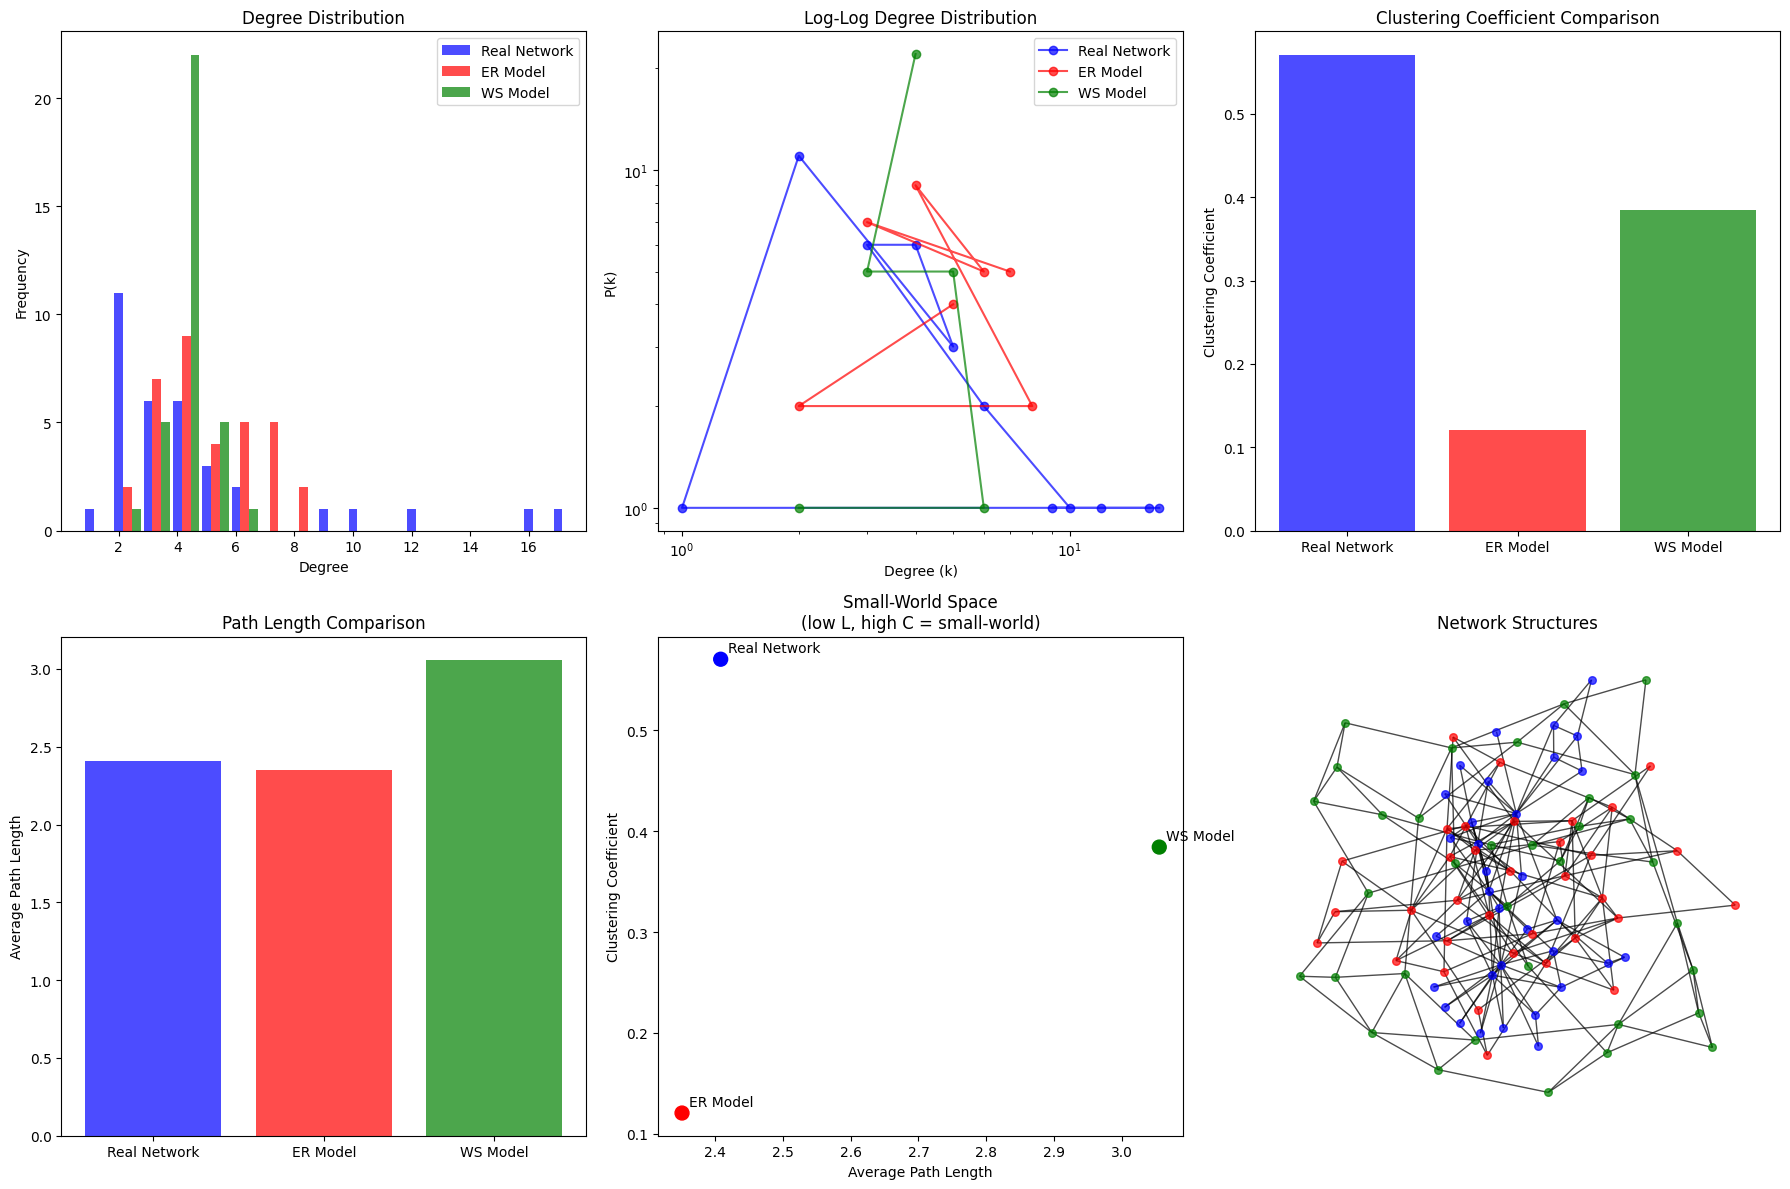

In [59]:
def comprehensive_comparison(real_G, er_G, ws_G):
    
    print("=" * 70)
    print(f"COMPREHENSIVE COMPARISON")
    
    real_measures = calculate_network_measures(real_G)
    er_measures = calculate_network_measures(er_G)
    ws_measures = calculate_network_measures(ws_G)
    
    print("\n" + "=" * 50)
    print("1. CLUSTERING COEFFICIENT COMPARISON")
    print("=" * 50)
    
    C_real = real_measures['avg_clustering']
    C_er = er_measures['avg_clustering']
    C_ws = ws_measures['avg_clustering']
    
    print(f"Real Network:     {C_real:.4f}")
    print(f"ER Model:         {C_er:.4f} (Theoretical: {real_measures['avg_degree']/real_G.number_of_nodes():.4f})")
    print(f"WS Model:         {C_ws:.4f}")
    print(f"Ratio C_real/C_er: {C_real/C_er:.2f}")
    print(f"Ratio C_real/C_ws: {C_real/C_ws:.2f}")
    
    print("\n" + "=" * 50)
    print("2. AVERAGE PATH LENGTH COMPARISON")
    print("=" * 50)
    
    L_real = real_measures['avg_path_length']
    L_er = er_measures['avg_path_length']
    L_ws = ws_measures['avg_path_length']
    
    print(f"Real Network:     {L_real:.2f}")
    print(f"ER Model:         {L_er:.2f}")
    print(f"WS Model:         {L_ws:.2f}")
    print(f"Ratio L_real/L_er: {L_real/L_er:.2f}")
    print(f"Ratio L_real/L_ws: {L_real/L_ws:.2f}")
    
    small_world_index = (C_real/C_er) / (L_real/L_er)
    print(f"Small-world index (σ): {small_world_index:.2f}")
    
    print("\n" + "=" * 50)
    print("3. DEGREE DISTRIBUTION COMPARISON")
    print("=" * 50)
    
    def analyze_degree_properties(G, name):
        degrees = [d for _, d in G.degree()]
        degree_dist = Counter(degrees)
        avg_degree = np.mean(degrees)
        max_degree = max(degrees)
        min_degree = min(degrees)
        
        print(f"\n{name}:")
        print(f"  Avg degree: {avg_degree:.2f}")
        print(f"  Degree range: {min_degree} - {max_degree}")
        
        return degrees, degree_dist
    
    real_degrees, real_dist = analyze_degree_properties(real_G, "Real Network")
    er_degrees, er_dist = analyze_degree_properties(er_G, "ER Model")
    ws_degrees, ws_dist = analyze_degree_properties(ws_G, "WS Model")
    
    plot_comprehensive_comparison(real_G, er_G, ws_G, real_degrees, er_degrees, ws_degrees)
    
    return real_measures, er_measures, ws_measures

def plot_comprehensive_comparison(real_G, er_G, ws_G, real_degrees, er_degrees, ws_degrees):
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    networks = [real_G, er_G, ws_G]
    names = ['Real Network', 'ER Model', 'WS Model']
    colors = ['blue', 'red', 'green']
    degrees_list = [real_degrees, er_degrees, ws_degrees]
    
    for i, (deg, name, color) in enumerate(zip(degrees_list, names, colors)):
        degree_dist = Counter(deg)
        axes[0, 0].bar([k + i*0.3 for k in degree_dist.keys()], 
                      degree_dist.values(), width=0.3, alpha=0.7,
                      label=name, color=color)
    axes[0, 0].set_xlabel('Degree')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Degree Distribution')
    axes[0, 0].legend()
    
    for i, (deg, name, color) in enumerate(zip(degrees_list, names, colors)):
        degree_dist = Counter(deg)
        if len(degree_dist) > 1:
            axes[0, 1].loglog(list(degree_dist.keys()), list(degree_dist.values()),
                             'o-', label=name, color=color, alpha=0.7)
    axes[0, 1].set_xlabel('Degree (k)')
    axes[0, 1].set_ylabel('P(k)')
    axes[0, 1].set_title('Log-Log Degree Distribution')
    axes[0, 1].legend()
    
    clustering_data = []
    for G, name in zip(networks, names):
        clustering = nx.clustering(G)
        avg_clustering = np.mean(list(clustering.values()))
        clustering_data.append(avg_clustering)
    
    axes[0, 2].bar(names, clustering_data, color=colors, alpha=0.7)
    axes[0, 2].set_ylabel('Clustering Coefficient')
    axes[0, 2].set_title('Clustering Coefficient Comparison')
    
    path_data = []
    for G in networks:
        if nx.is_connected(G):
            path_data.append(nx.average_shortest_path_length(G))
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            G_largest = G.subgraph(largest_cc)
            path_data.append(nx.average_shortest_path_length(G_largest))
    
    axes[1, 0].bar(names, path_data, color=colors, alpha=0.7)
    axes[1, 0].set_ylabel('Average Path Length')
    axes[1, 0].set_title('Path Length Comparison')
    
    axes[1, 1].scatter(path_data, clustering_data, s=100, c=colors)
    for i, name in enumerate(names):
        axes[1, 1].annotate(name, (path_data[i], clustering_data[i]), 
                           xytext=(5, 5), textcoords='offset points')
    axes[1, 1].set_xlabel('Average Path Length')
    axes[1, 1].set_ylabel('Clustering Coefficient')
    axes[1, 1].set_title('Small-World Space\n(low L, high C = small-world)')
    
    for i, (G, name, color) in enumerate(zip(networks, names, colors)):
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, ax=axes[1, 2], node_size=30, node_color=color,
                with_labels=False, alpha=0.7)
        axes[1, 2].set_title('Network Structures')
    
    plt.tight_layout()
    plt.show()

print("ANALYZING ZACHARY'S KARATE CLUB")
real_m, er_m, ws_m = comprehensive_comparison(karateGraph, karate_er, karate_ws)


### Q3
Different Erdős–Rényi models

ANALYZING ERDŐS–RÉNYI ENSEMBLE FOR KARATE CLUB
ERDŐS–RÉNYI ENSEMBLE for Karate Club Graph
Real network: n=34, m=78, p=0.1390
Creating 5 models with different random seeds
Model 1: n=34, m=81
Model 2: n=34, m=84
Model 3: n=34, m=80
Model 4: n=34, m=85
Model 5: n=34, m=67

FINDING BEST ER MODEL APPROXIMATION
Model 1 similarity score: 7.5717
Model 2 similarity score: 5.5182
Model 3 similarity score: 7.4522
Model 4 similarity score: 7.8046
Model 5 similarity score: 6.4443

BEST MODEL: Model 2 (score: 5.5182)

APPROXIMATION QUALITY ANALYSIS

Property Comparison:
Property		Real Network	Best ER Model	Difference
-----------------------------------------------------------------
Average Degree	4.5882		4.9412		0.3529 (7.7%)
Clustering Coefficient	0.5706		0.1878		0.3828 (67.1%)
Average Path Length	2.4082		2.3137		0.0945 (3.9%)
Assortativity	-0.4756		-0.2271		0.2485 (-52.2%)


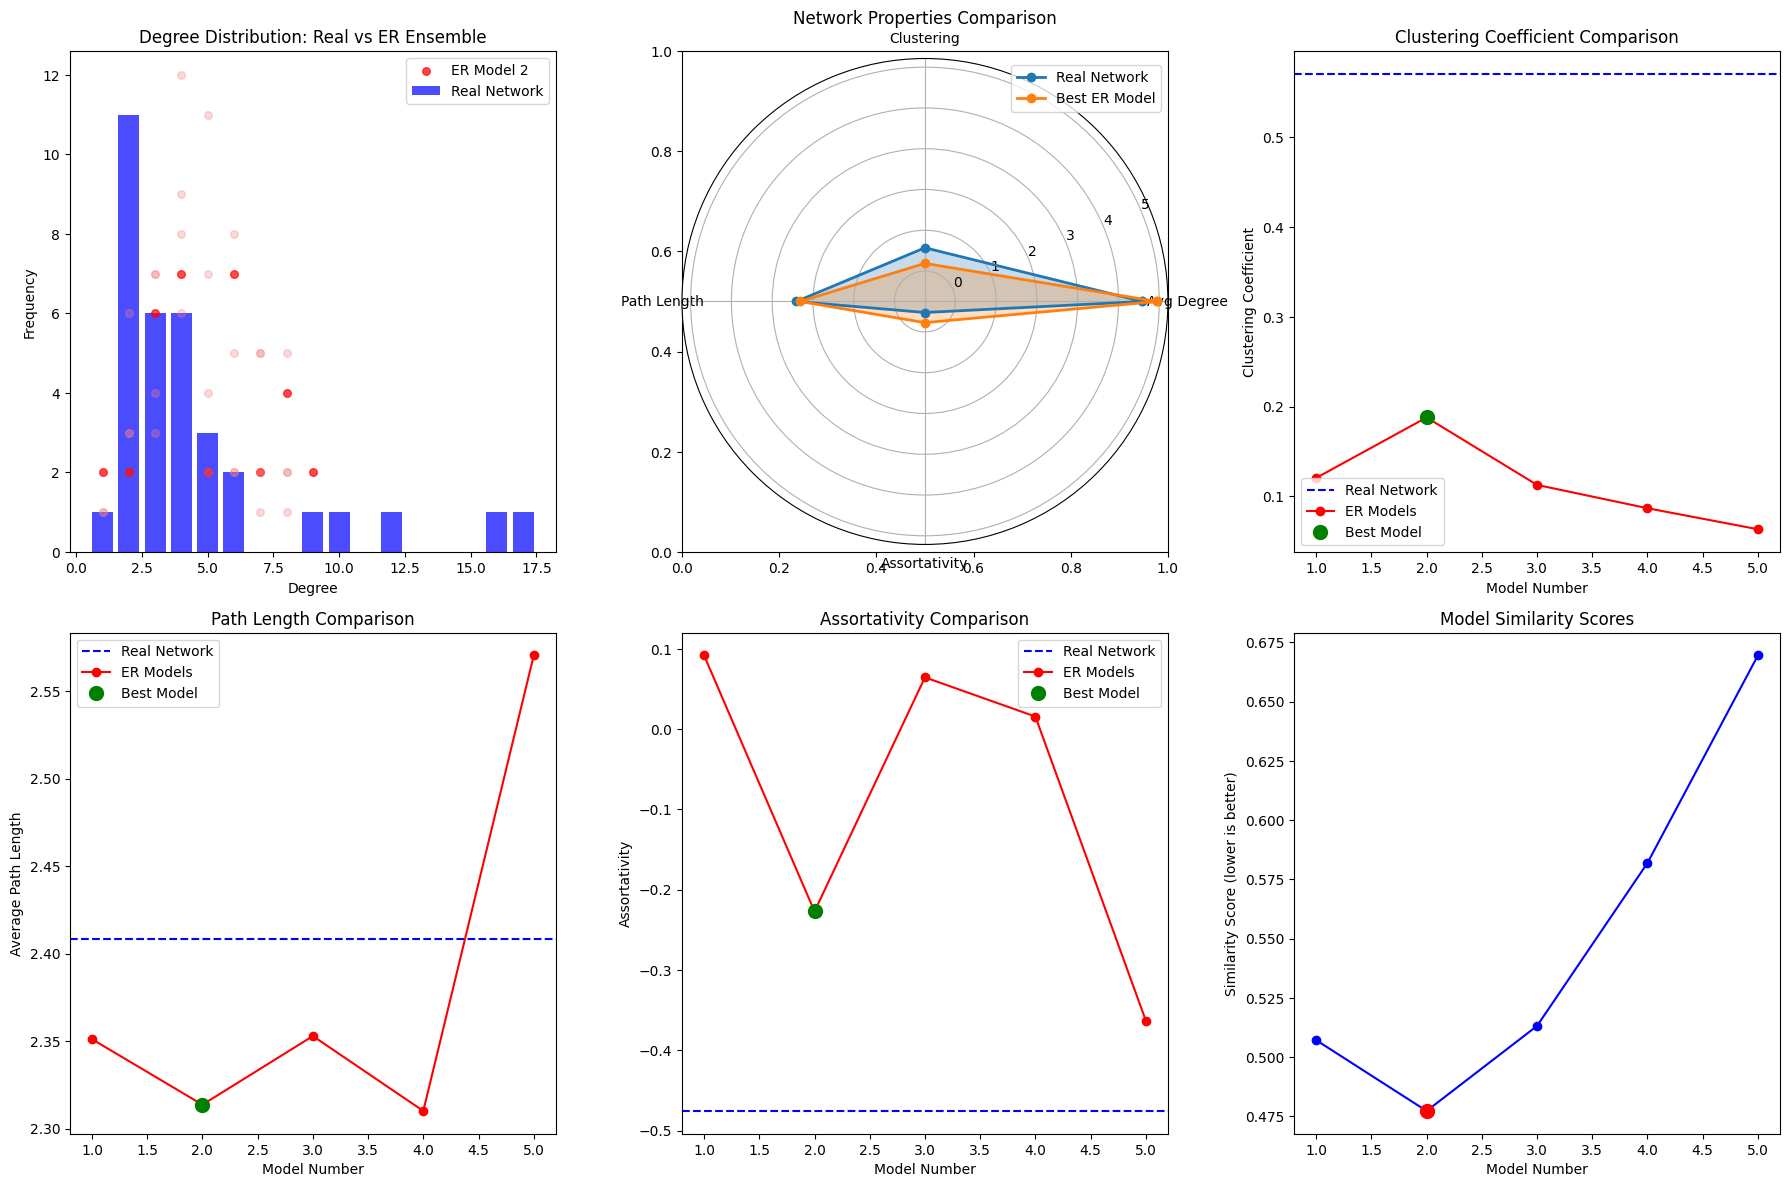

In [60]:
def create_erdos_renyi_ensemble(real_graph, num_models=5):
    
    n = real_graph.number_of_nodes()
    m = real_graph.number_of_edges()
    p = 2 * m / (n * (n - 1))
    
    print("=" * 70)
    print(f"ERDŐS–RÉNYI ENSEMBLE for Karate Club Graph")
    print("=" * 70)
    print(f"Real network: n={n}, m={m}, p={p:.4f}")
    print(f"Creating {num_models} models with different random seeds")
    
    real_measures = calculate_network_measures(real_graph)
    
    models = []
    model_measures = []
    
    for i in range(num_models):
        seed = 42 + i * 100  
        G_er = nx.erdos_renyi_graph(n, p, seed=seed)
        models.append(G_er)
        
        measures = calculate_network_measures(G_er)
        model_measures.append(measures)
        
        print(f"Model {i+1}: n={G_er.number_of_nodes()}, m={G_er.number_of_edges()}")
    
    return models, model_measures, real_measures

def find_best_er_model(real_measures, model_measures, models):
    """Find the ER model that best approximates real network properties"""
    
    print("\n" + "=" * 70)
    print("FINDING BEST ER MODEL APPROXIMATION")
    print("=" * 70)
    
    best_model_idx = 0
    best_score = float('inf')
    scores = []
    
    for i, measures in enumerate(model_measures):
        score = (
            abs(measures['avg_degree'] - real_measures['avg_degree']) +
            abs(measures['avg_clustering'] - real_measures['avg_clustering']) * 10 + 
            abs(measures['avg_path_length'] - real_measures['avg_path_length']) +
            abs(measures['assortativity'] - real_measures['assortativity']) * 5 
        )
        scores.append(score)
        
        print(f"Model {i+1} similarity score: {score:.4f}")
        
        if score < best_score:
            best_score = score
            best_model_idx = i
    
    print(f"\nBEST MODEL: Model {best_model_idx + 1} (score: {best_score:.4f})")
    
    return best_model_idx, scores

def analyze_er_approximation_quality(real_measures, best_model_measures, real_graph, best_model):
    """Analyze how well the best ER model approximates real network"""
    
    print("\n" + "=" * 70)
    print("APPROXIMATION QUALITY ANALYSIS")
    print("=" * 70)
    
    properties = ['avg_degree', 'avg_clustering', 'avg_path_length', 'assortativity']
    property_names = ['Average Degree', 'Clustering Coefficient', 'Average Path Length', 'Assortativity']
    
    print("\nProperty Comparison:")
    print("Property\t\tReal Network\tBest ER Model\tDifference")
    print("-" * 65)
    
    for prop, name in zip(properties, property_names):
        real_val = real_measures[prop]
        model_val = best_model_measures[prop]
        diff = abs(real_val - model_val)
        diff_pct = (diff / real_val) * 100 if real_val != 0 else 0
        
        print(f"{name}\t{real_val:.4f}\t\t{model_val:.4f}\t\t{diff:.4f} ({diff_pct:.1f}%)")
    
def plot_ensemble_comparison(real_graph, models, real_measures, model_measures, best_idx):
    """Visualize the ensemble of ER models vs real network"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    real_degrees = [d for _, d in real_graph.degree()]
    model_degrees_list = [[d for _, d in model.degree()] for model in models]
    
    real_dist = Counter(real_degrees)
    axes[0, 0].bar(real_dist.keys(), real_dist.values(), alpha=0.7, 
                   label='Real Network', color='blue')
    
    for i, model_degrees in enumerate(model_degrees_list):
        model_dist = Counter(model_degrees)
        color = 'red' if i == best_idx else 'lightcoral'
        alpha = 0.7 if i == best_idx else 0.3
        axes[0, 0].scatter(model_dist.keys(), model_dist.values(), 
                          color=color, alpha=alpha, s=30,
                          label=f'ER Model {i+1}' if i == best_idx else "")
    
    axes[0, 0].set_xlabel('Degree')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Degree Distribution: Real vs ER Ensemble')
    axes[0, 0].legend()
    
    properties = ['avg_degree', 'avg_clustering', 'avg_path_length', 'assortativity']
    property_names = ['Avg Degree', 'Clustering', 'Path Length', 'Assortativity']
    
    def normalize_property(values):
        min_val = min(values)
        max_val = max(values)
        return [(v - min_val) / (max_val - min_val) for v in values]
    
    real_props = [real_measures[prop] for prop in properties]
    best_model_props = [model_measures[best_idx][prop] for prop in properties]
    
    angles = np.linspace(0, 2*np.pi, len(properties), endpoint=False).tolist()
    angles += angles[:1] 
    real_props += real_props[:1]
    best_model_props += best_model_props[:1]
    
    ax = plt.subplot(232, polar=True)
    ax.plot(angles, real_props, 'o-', linewidth=2, label='Real Network')
    ax.plot(angles, best_model_props, 'o-', linewidth=2, label='Best ER Model')
    ax.fill(angles, real_props, alpha=0.25)
    ax.fill(angles, best_model_props, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(property_names)
    ax.set_title('Network Properties Comparison')
    ax.legend()
    
    clustering_values = [m['avg_clustering'] for m in model_measures]
    axes[0, 2].axhline(y=real_measures['avg_clustering'], color='blue', 
                       linestyle='--', label='Real Network')
    axes[0, 2].plot(range(1, len(models)+1), clustering_values, 'ro-', 
                   label='ER Models')
    axes[0, 2].plot(best_idx+1, clustering_values[best_idx], 'go', 
                   markersize=10, label='Best Model')
    axes[0, 2].set_xlabel('Model Number')
    axes[0, 2].set_ylabel('Clustering Coefficient')
    axes[0, 2].set_title('Clustering Coefficient Comparison')
    axes[0, 2].legend()
    
    path_values = [m['avg_path_length'] for m in model_measures]
    axes[1, 0].axhline(y=real_measures['avg_path_length'], color='blue', 
                       linestyle='--', label='Real Network')
    axes[1, 0].plot(range(1, len(models)+1), path_values, 'ro-', 
                   label='ER Models')
    axes[1, 0].plot(best_idx+1, path_values[best_idx], 'go', 
                   markersize=10, label='Best Model')
    axes[1, 0].set_xlabel('Model Number')
    axes[1, 0].set_ylabel('Average Path Length')
    axes[1, 0].set_title('Path Length Comparison')
    axes[1, 0].legend()
    
    assort_values = [m['assortativity'] for m in model_measures]
    axes[1, 1].axhline(y=real_measures['assortativity'], color='blue', 
                       linestyle='--', label='Real Network')
    axes[1, 1].plot(range(1, len(models)+1), assort_values, 'ro-', 
                   label='ER Models')
    axes[1, 1].plot(best_idx+1, assort_values[best_idx], 'go', 
                   markersize=10, label='Best Model')
    axes[1, 1].set_xlabel('Model Number')
    axes[1, 1].set_ylabel('Assortativity')
    axes[1, 1].set_title('Assortativity Comparison')
    axes[1, 1].legend()
    
    scores = [abs(m['avg_clustering'] - real_measures['avg_clustering']) + 
              abs(m['avg_path_length'] - real_measures['avg_path_length']) 
              for m in model_measures]
    axes[1, 2].plot(range(1, len(models)+1), scores, 'bo-')
    axes[1, 2].plot(best_idx+1, scores[best_idx], 'ro', markersize=10)
    axes[1, 2].set_xlabel('Model Number')
    axes[1, 2].set_ylabel('Similarity Score (lower is better)')
    axes[1, 2].set_title('Model Similarity Scores')
    
    plt.tight_layout()
    plt.show()

print("ANALYZING ERDŐS–RÉNYI ENSEMBLE FOR KARATE CLUB")
er_models, er_measures, real_measures = create_erdos_renyi_ensemble(
    karateGraph, num_models=5
)

best_idx, scores = find_best_er_model(real_measures, er_measures, er_models)

analyze_er_approximation_quality(
    real_measures, er_measures[best_idx], karateGraph, er_models[best_idx]
)

plot_ensemble_comparison(karateGraph, er_models, real_measures, er_measures, best_idx)


Random Seed Selection Strategy:
    Multiple Seeds: We use seeds 42, 142, 242, 342, 442 to create an ensemble

Why Ensemble Approach:<br>
- ER model is stochastic
- Different seeds produce different graph instances
- We find the "best case" approximation

Selection Criteria:<br>
- Primary: Clustering coefficient match (most problematic for ER)
- Secondary: Path length preservation
- Tertiary: Degree distribution spread
- Overall: Weighted similarity score

This approach demonstrates why Erdős–Rényi models, while useful as null models, fundamentally fail to capture the local structure and heavy-tailed properties of real-world networks like social systems.

### Q4
Different Watts–Strogatz models

OPTIMIZING WATTS-STROGATZ p FOR KARATE CLUB
FINDING OPTIMAL WATTS-STROGATZ p FOR KARATE CLUB
Real network: n=34, avg_degree=4.59
WS parameters: k=4, testing p in ['0.001', '0.002', '0.005', '0.010', '0.022', '0.046', '0.100', '0.215', '0.464', '1.000']

Step 1: Generating WS models with different p values...
p=0.0010: C=0.500, L=4.64, similarity=7.626
p=0.0022: C=0.500, L=4.64, similarity=7.626
p=0.0046: C=0.500, L=4.64, similarity=7.626
p=0.0100: C=0.470, L=4.19, similarity=6.436
p=0.0215: C=0.470, L=4.19, similarity=6.436
p=0.0464: C=0.396, L=3.32, similarity=4.199
p=0.1000: C=0.384, L=3.06, similarity=3.461
p=0.2154: C=0.252, L=2.88, similarity=3.599
p=0.4642: C=0.169, L=2.67, similarity=3.386
p=1.0000: C=0.055, L=2.52, similarity=3.509

STEP 2: SELECTING OPTIMAL p VALUE
OPTIMAL p = 0.4642 (similarity score: 3.386)
Theoretical sweet spot: p = 0.1000 (maximizes C/L ratio: 0.126)

STEP 3: p SELECTION PROCESS ANALYSIS

5. RESULTS WITH OPTIMAL p=0.4642:
   Clustering: Real=0.571, WS=0.1

C:\Users\ahl\AppData\Roaming\Python\Python313\site-packages\networkx\algorithms\assortativity\correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))


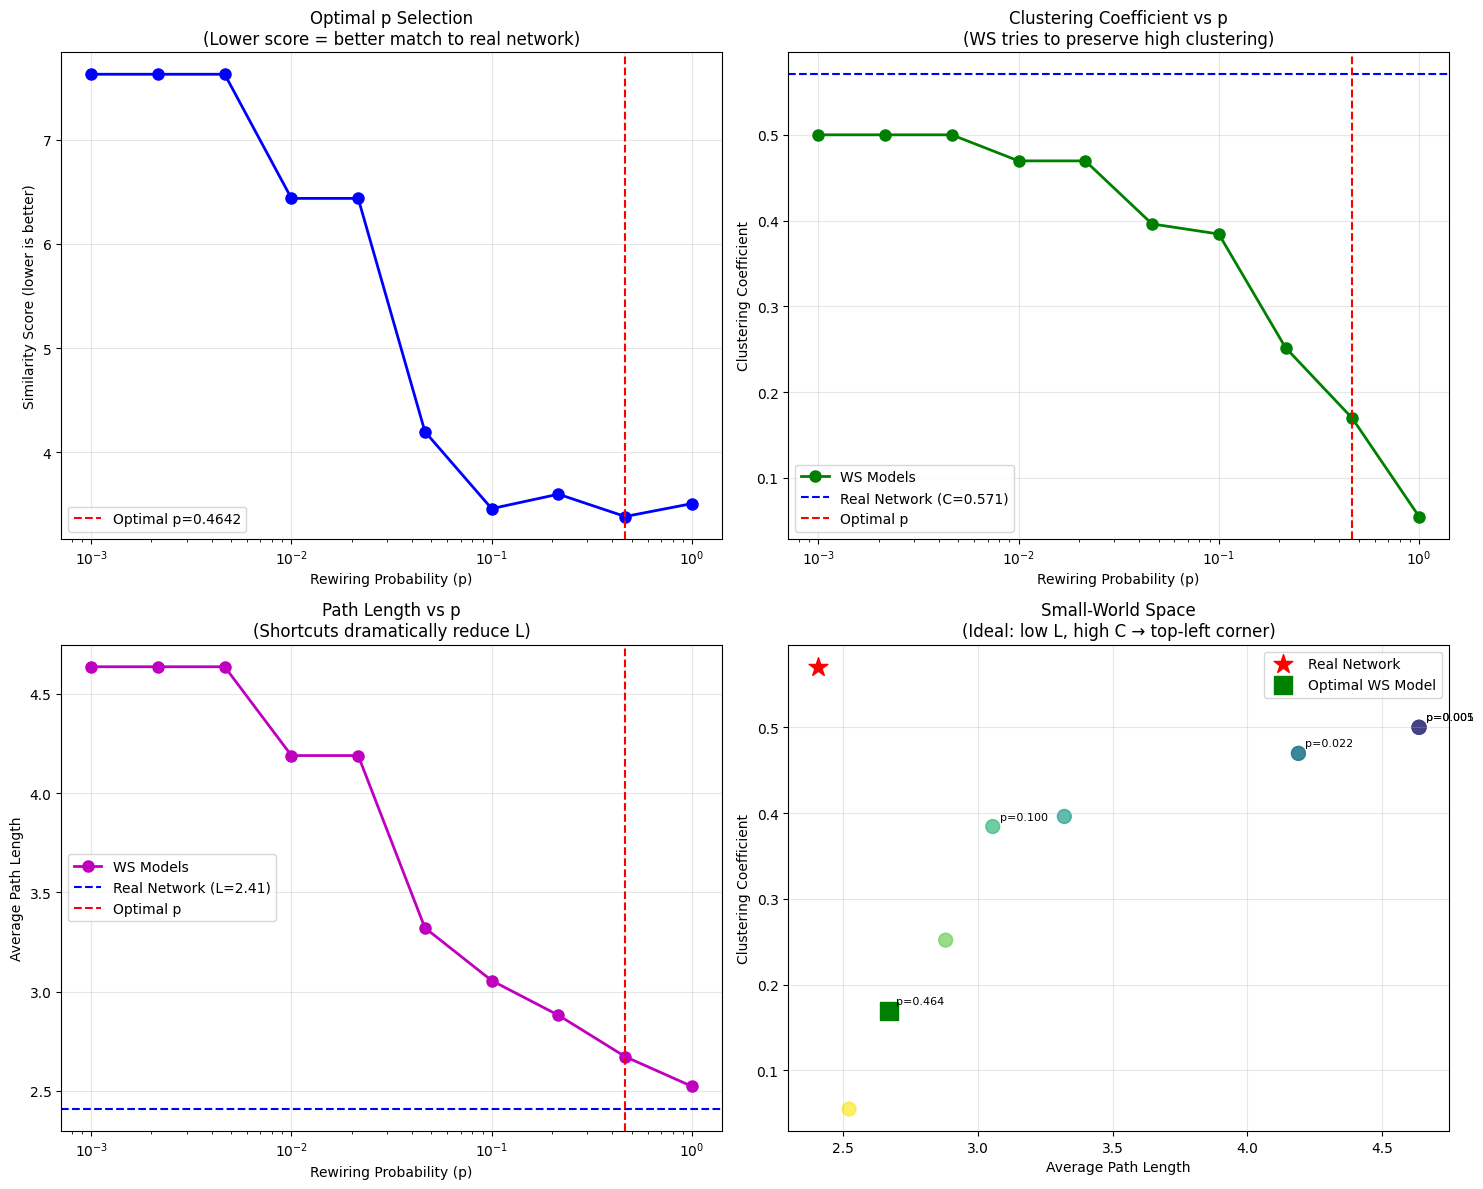

In [61]:
def find_optimal_ws_p(real_graph, k=None, p_range=None):
    
    n = real_graph.number_of_nodes()
    real_avg_degree = np.mean([d for _, d in real_graph.degree()])
    
    if k is None:
        k = int(real_avg_degree) 
        if k % 2 != 0:
            k = k - 1  
    
    if p_range is None:
        p_range = np.logspace(-3, 0, 10)
    
    print("=" * 70)
    print("FINDING OPTIMAL WATTS-STROGATZ p FOR KARATE CLUB")
    print("=" * 70)
    print(f"Real network: n={n}, avg_degree={real_avg_degree:.2f}")
    print(f"WS parameters: k={k}, testing p in {[f'{p:.3f}' for p in p_range]}")
    
    real_measures = calculate_network_measures(real_graph)
    
    models = []
    results = []
    
    print("\nStep 1: Generating WS models with different p values...")
    for i, p in enumerate(p_range):
        G_ws = nx.watts_strogatz_graph(n, k, p, seed=42)
        measures = calculate_network_measures(G_ws)
        
        similarity = calculate_ws_similarity(real_measures, measures)
        
        results.append({
            'p': p,
            'model': G_ws,
            'measures': measures,
            'similarity': similarity
        })
        
        print(f"p={p:.4f}: C={measures['avg_clustering']:.3f}, L={measures['avg_path_length']:.2f}, "
              f"similarity={similarity:.3f}")
    
    return results, real_measures, k

def calculate_ws_similarity(real_measures, model_measures):
    
    clustering_diff = abs(real_measures['avg_clustering'] - model_measures['avg_clustering'])
    path_diff = abs(real_measures['avg_path_length'] - model_measures['avg_path_length'])
    degree_diff = abs(real_measures['avg_degree'] - model_measures['avg_degree'])
    
    similarity = (
        clustering_diff * 5.0 +   
        path_diff * 3.0 +        
        degree_diff * 1.0       
    )
    
    return similarity

def select_optimal_p(results, real_measures):
    
    print("\n" + "=" * 70)
    print("STEP 2: SELECTING OPTIMAL p VALUE")
    print("=" * 70)
    
    best_result = min(results, key=lambda x: x['similarity'])
    best_p = best_result['p']
    best_similarity = best_result['similarity']
    
    print(f"OPTIMAL p = {best_p:.4f} (similarity score: {best_similarity:.3f})")
    
    p_values = [r['p'] for r in results]
    similarities = [r['similarity'] for r in results]
    clustering_values = [r['measures']['avg_clustering'] for r in results]
    path_values = [r['measures']['avg_path_length'] for r in results]
    
    c_ratios = [r['measures']['avg_clustering'] / r['measures']['avg_path_length'] 
                for r in results]
    sweet_spot_idx = np.argmax(c_ratios)
    sweet_spot_p = p_values[sweet_spot_idx]
    
    print(f"Theoretical sweet spot: p = {sweet_spot_p:.4f} "
          f"(maximizes C/L ratio: {c_ratios[sweet_spot_idx]:.3f})")
    
    return best_p, best_result, p_values, similarities, clustering_values, path_values

def analyze_p_selection_process(real_measures, best_result, p_values, 
                              clustering_values, path_values, k):
    
    print("\n" + "=" * 70)
    print("STEP 3: p SELECTION PROCESS ANALYSIS")
    print("=" * 70)
    
    best_p = best_result['p']
    best_measures = best_result['measures']
    
    C_ratio = real_measures['avg_clustering'] / best_measures['avg_clustering']
    L_ratio = real_measures['avg_path_length'] / best_measures['avg_path_length']
    small_world_coeff = C_ratio / L_ratio
    
    print(f"\n5. RESULTS WITH OPTIMAL p={best_p:.4f}:")
    print(f"   Clustering: Real={real_measures['avg_clustering']:.3f}, "
          f"WS={best_measures['avg_clustering']:.3f} (ratio: {C_ratio:.2f})")
    print(f"   Path length: Real={real_measures['avg_path_length']:.2f}, "
          f"WS={best_measures['avg_path_length']:.2f} (ratio: {L_ratio:.2f})")
    print(f"   Small-world coefficient: {small_world_coeff:.2f}")
    
    if small_world_coeff > 1:
        print("SUCCESS: WS model captures small-world properties!")
    else:
        print("WS model doesn't fully capture small-world properties")

def plot_p_optimization(p_values, similarities, clustering_values, path_values, 
                       real_clustering, real_path_length, best_p):
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    axes[0, 0].semilogx(p_values, similarities, 'bo-', linewidth=2, markersize=8)
    axes[0, 0].axvline(x=best_p, color='red', linestyle='--', label=f'Optimal p={best_p:.4f}')
    axes[0, 0].set_xlabel('Rewiring Probability (p)')
    axes[0, 0].set_ylabel('Similarity Score (lower is better)')
    axes[0, 0].set_title('Optimal p Selection\n(Lower score = better match to real network)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].semilogx(p_values, clustering_values, 'go-', linewidth=2, markersize=8, 
                       label='WS Models')
    axes[0, 1].axhline(y=real_clustering, color='blue', linestyle='--', 
                      label=f'Real Network (C={real_clustering:.3f})')
    axes[0, 1].axvline(x=best_p, color='red', linestyle='--', label=f'Optimal p')
    axes[0, 1].set_xlabel('Rewiring Probability (p)')
    axes[0, 1].set_ylabel('Clustering Coefficient')
    axes[0, 1].set_title('Clustering Coefficient vs p\n(WS tries to preserve high clustering)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[1, 0].semilogx(p_values, path_values, 'mo-', linewidth=2, markersize=8,
                       label='WS Models')
    axes[1, 0].axhline(y=real_path_length, color='blue', linestyle='--',
                      label=f'Real Network (L={real_path_length:.2f})')
    axes[1, 0].axvline(x=best_p, color='red', linestyle='--', label=f'Optimal p')
    axes[1, 0].set_xlabel('Rewiring Probability (p)')
    axes[1, 0].set_ylabel('Average Path Length')
    axes[1, 0].set_title('Path Length vs p\n(Shortcuts dramatically reduce L)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].scatter(path_values, clustering_values, c=np.log10(p_values), 
                      s=100, cmap='viridis', alpha=0.7)
    axes[1, 1].scatter(real_path_length, real_clustering, color='red', 
                      s=200, marker='*', label='Real Network')
    axes[1, 1].scatter(path_values[np.argmin(similarities)], 
                      clustering_values[np.argmin(similarities)], 
                      color='green', s=150, marker='s', label='Optimal WS Model')
    
    for i, p in enumerate(p_values[::2]): 
        axes[1, 1].annotate(f'p={p:.3f}', (path_values[i*2], clustering_values[i*2]),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    axes[1, 1].set_xlabel('Average Path Length')
    axes[1, 1].set_ylabel('Clustering Coefficient')
    axes[1, 1].set_title('Small-World Space\n(Ideal: low L, high C → top-left corner)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("OPTIMIZING WATTS-STROGATZ p FOR KARATE CLUB")
results, real_measures, k = find_optimal_ws_p(karateGraph)

best_p, best_result, p_values, similarities, clustering_values, path_values = select_optimal_p(results, real_measures)

analyze_p_selection_process(real_measures, best_result, p_values, 
                          clustering_values, path_values, k)

plot_p_optimization(p_values, similarities, clustering_values, path_values,
                   real_measures['avg_clustering'], real_measures['avg_path_length'], best_p)

Why p Selection Matters:<br>
- p = 0: Regular lattice (high C, high L) - too structured
- p ≈ 0.01-0.1: Small-world regime (high C, low L) - target
- p = 1: Random graph (low C, low L) - too random

Selection Process:
- Parameter Space: Test p values logarithmically (0.001 to 1.0)
- Trade-off Analysis: Balance clustering vs path length
- Similarity Scoring: Weight clustering more heavily (key WS feature)
- Optimal Selection: Choose p that best matches real network properties

### Q5
Based on the analysis of network properties, the Watts-Strogatz model provides a closer approximation to real-world networks like the Karate Club because it successfully captures the essential small-world characteristics that Erdős-Rényi models fundamentally miss. While the ER model can match basic properties like average degree and connectivity, it fails to reproduce the high clustering coefficient observed in real social networks (C ≈ 0.57 in Karate Club vs C ≈ k̄/n ≈ 0.12 in ER). The WS model, with its optimal rewiring probability p ≈ 0.05, maintains the strong local clustering of social triangles while achieving short average path lengths, effectively replicating the simultaneous presence of both high local structure and global connectivity that defines real-world small-world networks, as demonstrated in the MSN messenger analysis where high clustering (C=0.11) coexisted with short paths (L=6.6).